# Implementation of Deep Reach Centrality in sample graph

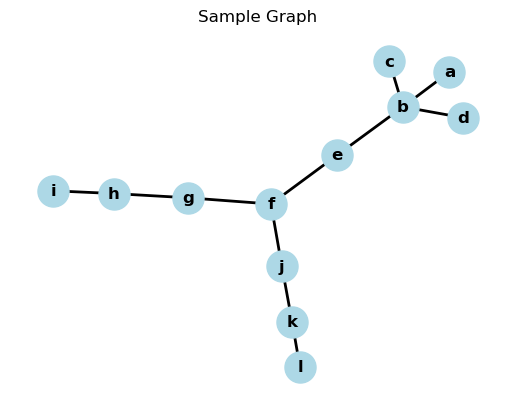

reach_centrality data saved to reach_centrality.xlsx
deep_reach_centrality data saved to deep_reach_centrality.xlsx
closeness_centrality data saved to closeness_centrality.xlsx
harmonic_centrality data saved to harmonic_centrality.xlsx
degree_centrality data saved to degree_centrality.xlsx
decay_centrality data saved to decay_centrality.xlsx
eccentricity data saved to eccentricity.xlsx
radiality_centrality data saved to radiality_centrality.xlsx
load_centrality data saved to load_centrality.xlsx
approximate_current_flow_betweenness_centrality data saved to approximate_current_flow_betweenness_centrality.xlsx
betweenness_centrality data saved to betweenness_centrality.xlsx
current_flow_closeness_centrality data saved to current_flow_closeness_centrality.xlsx
information_centrality data saved to information_centrality.xlsx
current_flow_betweenness_centrality data saved to current_flow_betweenness_centrality.xlsx


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

nodes1 = ['a','b','c','d','e','f','g','h','i','j','k','l']
edges1 = [('d','b'),('c','b'),('a','b'),('b','e'),('e','f'),('f','g'),('f','j'),('g','h'),('j','k'),('h','i'),('k','l')]

EG1 = nx.Graph()

EG1.add_nodes_from(nodes1)
EG1.add_edges_from(edges1)

plt.title("Sample Graph")

pos = nx.spring_layout(EG1)  
nx.draw(EG1, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=2)

# # Save the combined image
combined_filename = "sample_graph/sample_graph.png"
plt.savefig(combined_filename, dpi=300, bbox_inches='tight')

plt.show()
# Centrality Measures ----------------------------

def reach_centrality(G):
    from collections import Counter
    import networkx as nx
    shortest_path_lengths = dict(nx.shortest_path_length(G))
    centrality = dict()
    for x in shortest_path_lengths.values():
        lst = list(x.values())
        key = list(x.keys())
        filtered_values = [x for x in lst if x != 0]
        value_counts = Counter(filtered_values)
        rc = 1
        for value, count in value_counts.items():
            rc = rc + (count/value)
        centrality[key[0]] = rc
    return centrality

rc = reach_centrality(EG1)


def deep_reach_centrality(G):
    import networkx as nx
    shortest_path_lengths = dict(nx.shortest_path_length(G))
    centrality = dict()
    for x in shortest_path_lengths.values():
        key = list(x.keys())
        drc = 0
        for k,v in x.items():
            d = nx.degree(G,k)
            if v!=0 and d!=0:
                drc = drc + (d/v)
        centrality[key[0]] = drc
    return centrality

drc = deep_reach_centrality(EG1)

clo = nx.closeness_centrality(EG1)
har = nx.harmonic_centrality(EG1)
deg = nx.degree_centrality(EG1)

# Decay Centrality
delta = 0.5  # You can adjust this parameter as needed
dec = {}
for node in EG1.nodes:
    decay_values = [delta ** dist for dist in nx.shortest_path_length(EG1, source=node).values()]
    dec[node] = sum(decay_values)

ecc = nx.eccentricity(EG1)

# Radiality centrality
def calculate_radiality_centrality(graph):
    n = len(graph.nodes)
    diam = nx.diameter(graph)
    radiality_centrality = {}
    for u in graph.nodes:
        total_distance = 0
        for w in graph.nodes:
            if u != w:
                total_distance += (diam + 1 - nx.shortest_path_length(graph, source=u, target=w))
        radiality_centrality[u] = total_distance / (n - 1)
    return radiality_centrality

rad = calculate_radiality_centrality(EG1)

load=nx.load_centrality(EG1)

acfb=nx.approximate_current_flow_betweenness_centrality(EG1)

bet = nx.betweenness_centrality(EG1)

cfc=nx.current_flow_closeness_centrality(EG1)

inf=nx.information_centrality(EG1)

cfb=nx.current_flow_betweenness_centrality(EG1)


# Store each centrality function in separate Excel files, sorted by centrality values

centrality_functions = {
     "reach_centrality": rc,
    "deep_reach_centrality": drc,
    "closeness_centrality": clo,
    "harmonic_centrality": har,
    "degree_centrality": deg,
    "decay_centrality": dec,
    "eccentricity": ecc,
    "radiality_centrality":rad,
    "load_centrality": load,
    "approximate_current_flow_betweenness_centrality": acfb,
    "betweenness_centrality": bet,
    "current_flow_closeness_centrality": cfc,
    "information_centrality": inf,
    "current_flow_betweenness_centrality": cfb
   
}

# Save the outputs

for centrality_name, centrality_data in centrality_functions.items():
    df = pd.DataFrame(centrality_data.items(), columns=["Node", centrality_name])
    excel_file_name = f"{centrality_name}.xlsx"
    excel_file_path = "sample_graph/centrality_measures/" + excel_file_name
    df.to_excel(excel_file_path, index=False)
    print(f"{centrality_name} data saved to {excel_file_name}")

    
    

# Centrality measures of sample graph

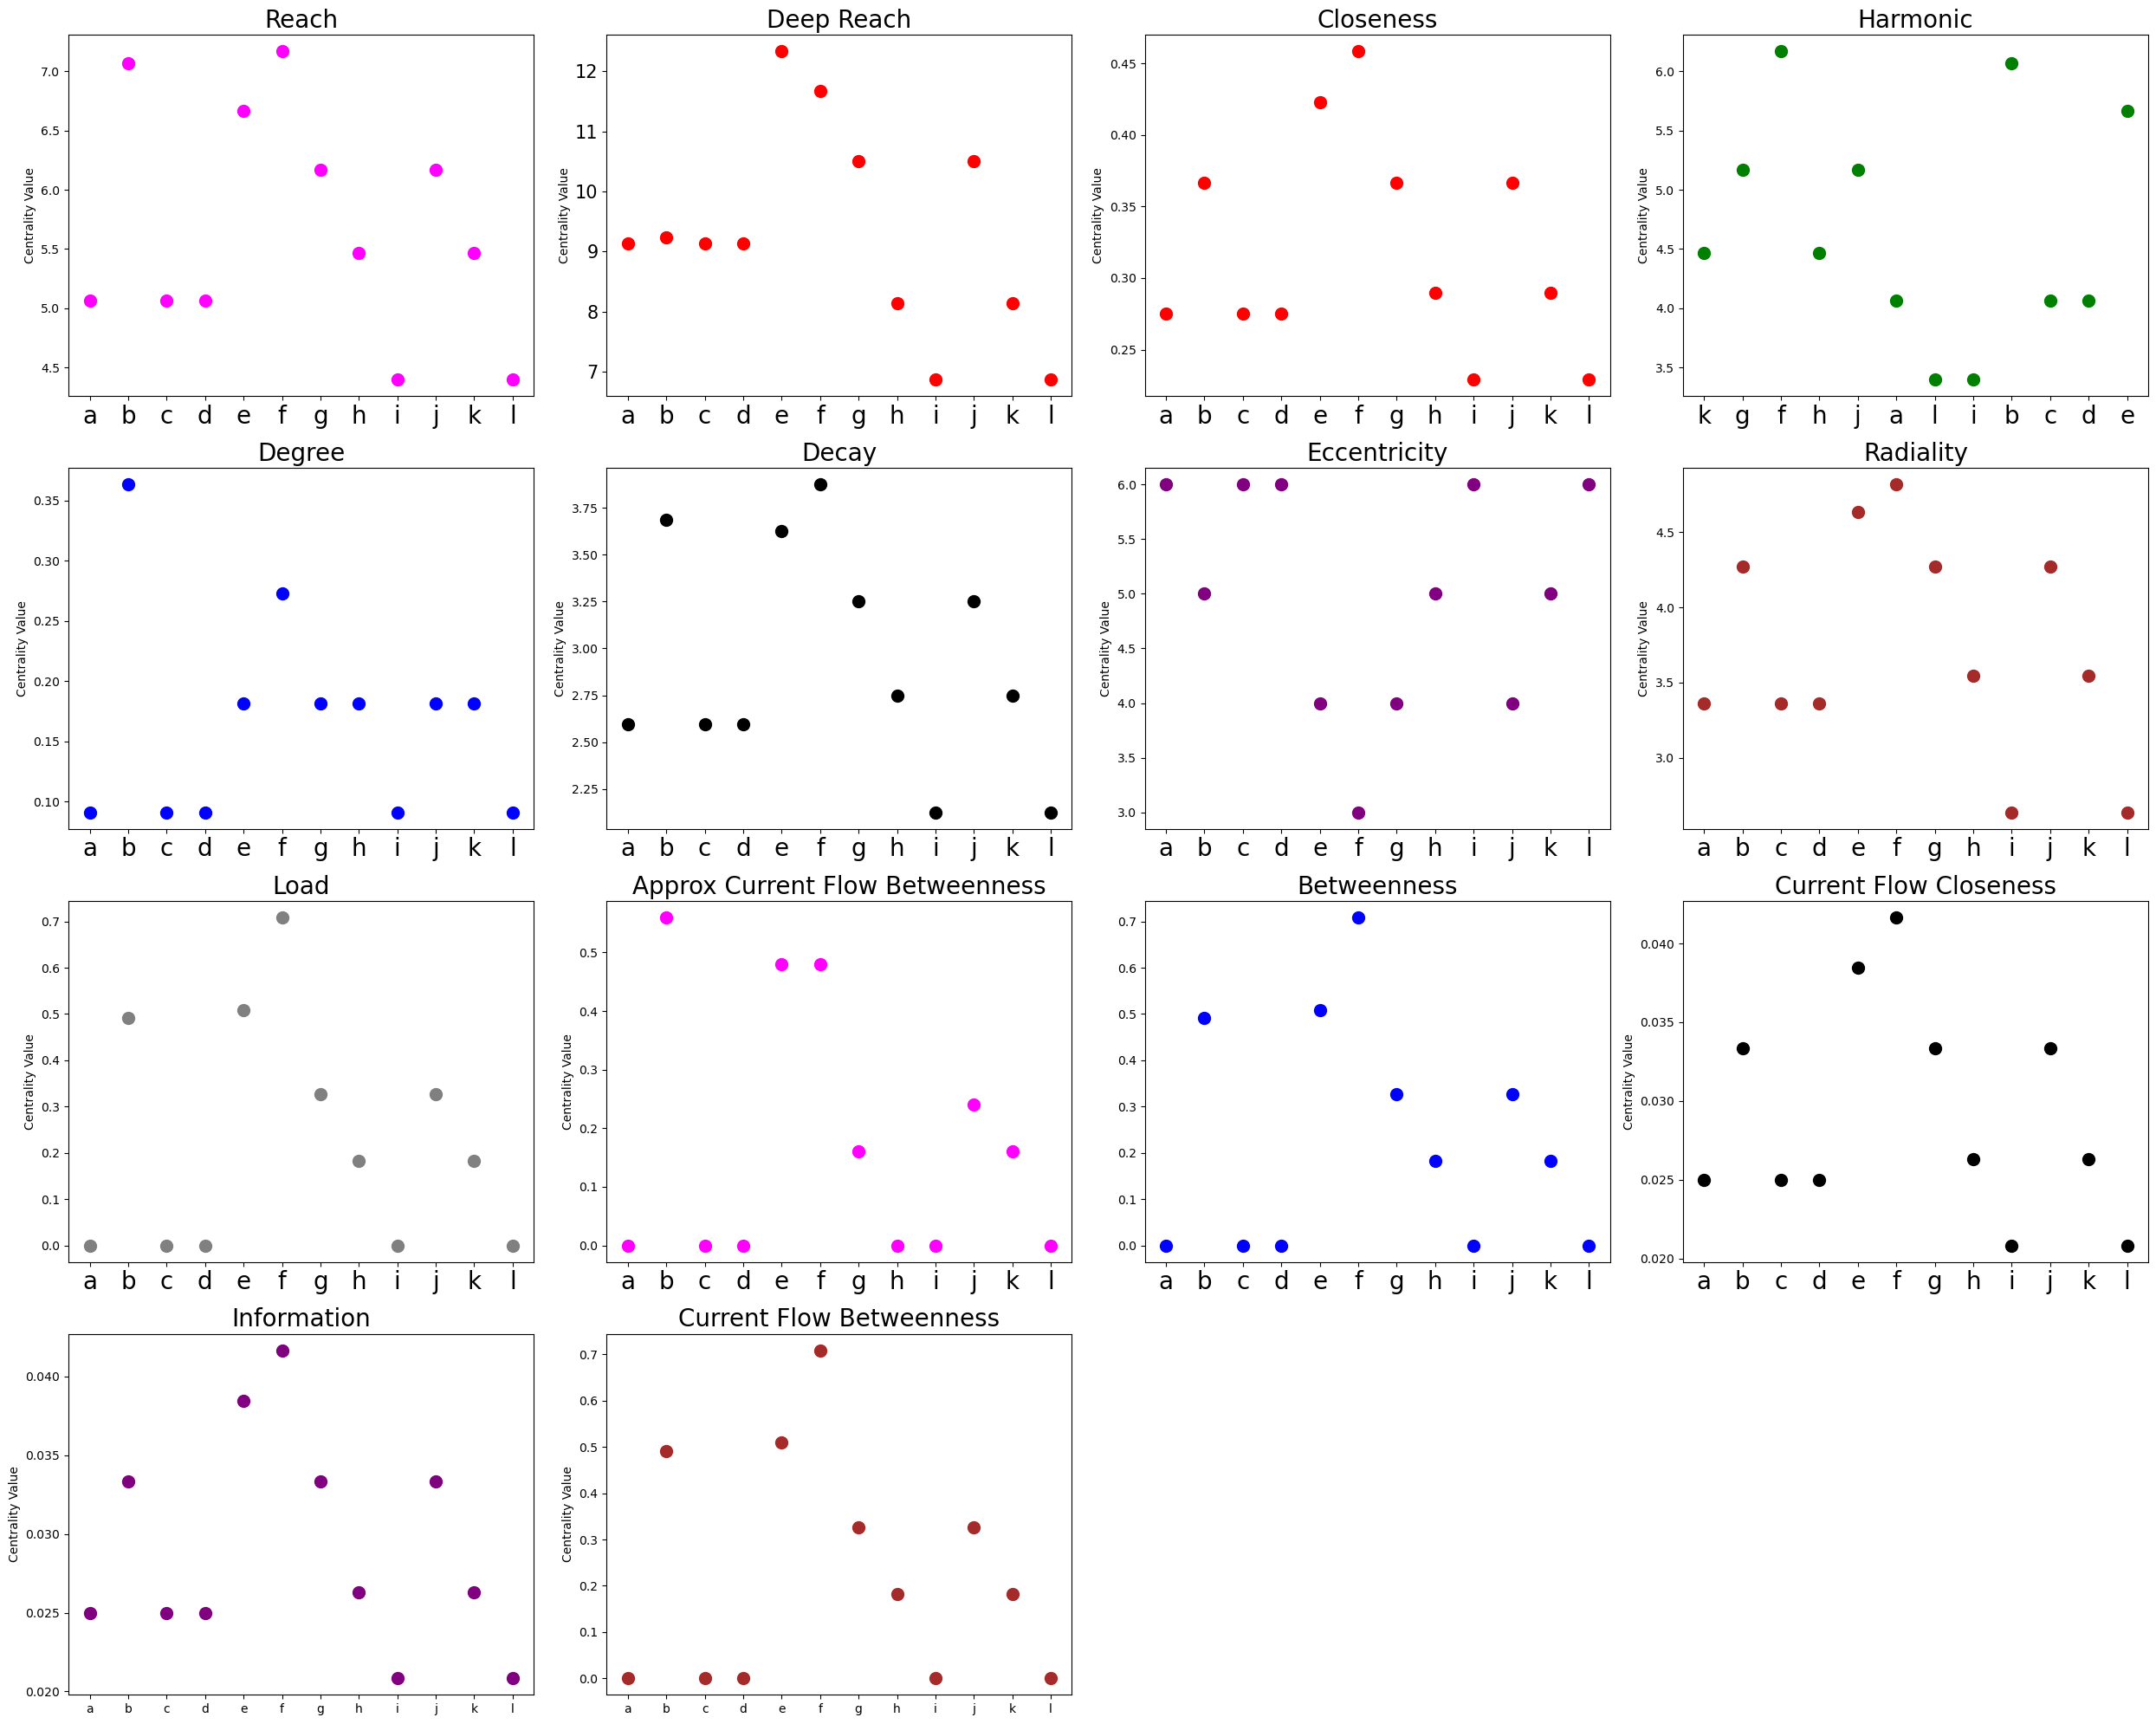

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Load centrality data for the two graphs and centrality measures
reach_centrality = pd.read_excel("sample_graph/centrality_measures/reach_centrality.xlsx")
deep_reach_centrality = pd.read_excel("sample_graph/centrality_measures/deep_reach_centrality.xlsx")
closeness_centrality = pd.read_excel("sample_graph/centrality_measures/closeness_centrality.xlsx")
harmonic_centrality = pd.read_excel("sample_graph/centrality_measures/harmonic_centrality.xlsx")
degree_centrality = pd.read_excel("sample_graph/centrality_measures/degree_centrality.xlsx")
decay_centrality = pd.read_excel("sample_graph/centrality_measures/decay_centrality.xlsx")
eccentricity = pd.read_excel("sample_graph/centrality_measures/eccentricity.xlsx")
radiality_centrality = pd.read_excel("sample_graph/centrality_measures/radiality_centrality.xlsx")
load_centrality = pd.read_excel("sample_graph/centrality_measures/load_centrality.xlsx")
approximate_current_flow_betweenness_centrality = pd.read_excel("sample_graph/centrality_measures/approximate_current_flow_betweenness_centrality.xlsx")
betweenness_centrality = pd.read_excel("sample_graph/centrality_measures/betweenness_centrality.xlsx")
current_flow_closeness_centrality = pd.read_excel("sample_graph/centrality_measures/current_flow_closeness_centrality.xlsx")
information_centrality = pd.read_excel("sample_graph/centrality_measures/information_centrality.xlsx")
current_flow_betweenness_centrality = pd.read_excel("sample_graph/centrality_measures/current_flow_betweenness_centrality.xlsx")


# Create subplots for each centrality measure
plt.figure(figsize=(25, 20))

# Reach
plt.subplot(4, 4, 1)
plt.scatter(reach_centrality['Node'], reach_centrality['reach_centrality'], s=100, color='magenta')
plt.ylabel('Centrality Value')
plt.title('Reach',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Deep Reach
plt.subplot(4, 4, 2)
plt.scatter(deep_reach_centrality['Node'], deep_reach_centrality['deep_reach_centrality'], s=100, color='red')
plt.ylabel('Centrality Value')
plt.title('Deep Reach',fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.tick_params(axis='y', labelsize=15)

# Closeness
plt.subplot(4, 4, 3)
plt.scatter(closeness_centrality['Node'], closeness_centrality['closeness_centrality'], s=100, color='red')
plt.ylabel('Centrality Value')
plt.title('Closeness',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Harmonic
plt.subplot(4, 4, 4)
plt.scatter(harmonic_centrality['Node'], harmonic_centrality['harmonic_centrality'], s=100, color='green')
plt.ylabel('Centrality Value')
plt.title('Harmonic',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Degree
plt.subplot(4, 4, 5)
plt.scatter(degree_centrality['Node'], degree_centrality['degree_centrality'], s=100, color='blue')
plt.ylabel('Centrality Value')
plt.title('Degree',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Decay
plt.subplot(4, 4, 6)
plt.scatter(decay_centrality['Node'], decay_centrality['decay_centrality'], s=100, color='black')
plt.ylabel('Centrality Value')
plt.title('Decay',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Eccentricity
plt.subplot(4, 4, 7)
plt.scatter(eccentricity['Node'], eccentricity['eccentricity'], s=100, color='purple')
plt.ylabel('Centrality Value')
plt.title('Eccentricity',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Radiality
plt.subplot(4, 4, 8)
plt.scatter(radiality_centrality['Node'], radiality_centrality['radiality_centrality'], s=100, color='brown')
plt.ylabel('Centrality Value')
plt.title('Radiality',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# load
plt.subplot(4, 4, 9)
plt.scatter(load_centrality['Node'], load_centrality['load_centrality'], s=100, color='gray')
plt.ylabel('Centrality Value')
plt.title('Load',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Approximate Current Flow Betweenness
plt.subplot(4, 4, 10)
plt.scatter(approximate_current_flow_betweenness_centrality['Node'], approximate_current_flow_betweenness_centrality['approximate_current_flow_betweenness_centrality'], s=100, color='magenta')
plt.ylabel('Centrality Value')
plt.title('Approx Current Flow Betweenness',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# --------------
# Betweenness
plt.subplot(4, 4, 11)
plt.scatter(betweenness_centrality['Node'], betweenness_centrality['betweenness_centrality'], s=100, color='blue')
plt.title('Betweenness',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Current Flow Closeness
plt.subplot(4, 4, 12)
plt.scatter(current_flow_closeness_centrality['Node'], current_flow_closeness_centrality['current_flow_closeness_centrality'], s=100, color='black')
plt.ylabel('Centrality Value')
plt.title('Current Flow Closeness',fontsize=20)
plt.xticks(rotation=0, fontsize=20)

# Information
plt.subplot(4, 4, 13)
plt.scatter(information_centrality['Node'], information_centrality['information_centrality'], s=100, color='purple')
plt.ylabel('Centrality Value')
plt.title('Information',fontsize=20)

# Current Flow Betweenness
plt.subplot(4, 4, 14)
plt.scatter(current_flow_betweenness_centrality['Node'], current_flow_betweenness_centrality['current_flow_betweenness_centrality'], s=100, color='brown')
plt.ylabel('Centrality Value')
plt.title('Current Flow Betweenness',fontsize=20)





plt.tight_layout()

# # Save the combined image
combined_filename = "sample_graph/centrality_measures.png"
plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------------------------

# Project DRC

# ---------------------------------------------------------------------------

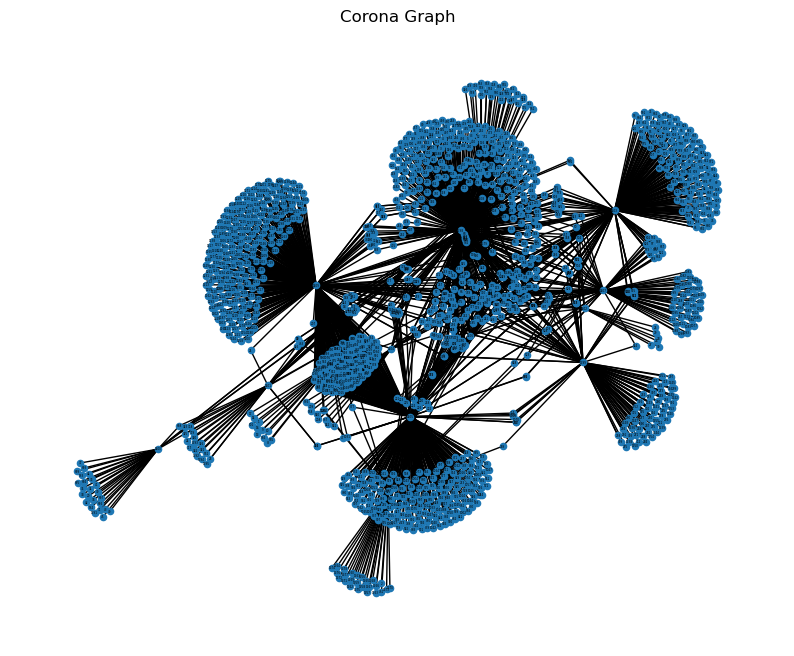

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = "datasets/corona_edges.csv"
data = pd.read_csv(file_path)

G = nx.Graph()

for index, row in data.iterrows():
    node1 = row["V1"]
    node2 = row["V2"]
    G.add_edge(node1, node2)

fig, ax = plt.subplots(figsize=(10, 8))

nx.draw(G, with_labels=True, node_size=20, font_size=2, ax=ax)
plt.title('Corona Graph')
plt.savefig("figures/corona_graph.png", dpi=300, bbox_inches='tight')

plt.show()


In [5]:
print(G)

Graph with 1409 nodes and 1922 edges


# Corona Centrality Measures

In [6]:
import networkx as nx
import pandas as pd


corona_edge_data = pd.read_csv("datasets/corona_edges.csv"  )

G = nx.Graph().to_undirected()

edges = list(zip(corona_edge_data["V1"], corona_edge_data["V2"]))
G.add_edges_from(edges)


# Calculate centrality measures

closeness_centrality = nx.closeness_centrality(G)
harmonic_centrality = nx.harmonic_centrality(G)
degree_centrality = nx.degree_centrality(G)

# Decay Centrality
delta = 0.5  # You can adjust this parameter as needed
decay_centrality = {}
for node in G.nodes:
    decay_values = [delta ** dist for dist in nx.shortest_path_length(G, source=node).values()]
    decay_centrality[node] = sum(decay_values)

eccentricity = nx.eccentricity(G)

# Radiality centrality
def calculate_radiality_centrality(graph):
    n = len(graph.nodes)
    diam = nx.diameter(graph)
    radiality_centrality = {}
    for u in graph.nodes:
        total_distance = 0
        for w in graph.nodes:
            if u != w:
                total_distance += (diam + 1 - nx.shortest_path_length(graph, source=u, target=w))
        radiality_centrality[u] = total_distance / (n - 1)
    return radiality_centrality

radiality_centrality = calculate_radiality_centrality(G)

load_centrality=nx.load_centrality(G)

approximate_current_flow_betweenness_centrality=nx.approximate_current_flow_betweenness_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

current_flow_closeness_centrality=nx.current_flow_closeness_centrality(G)

information_centrality=nx.information_centrality(G)

current_flow_betweenness_centrality=nx.current_flow_betweenness_centrality(G)

def reach_centrality(G):
    from collections import Counter
    import networkx as nx
    shortest_path_lengths = dict(nx.shortest_path_length(G))
    centrality = dict()
    for x in shortest_path_lengths.values():
        lst = list(x.values())
        key = list(x.keys())
        filtered_values = [x for x in lst if x != 0]
        value_counts = Counter(filtered_values)
        rc = 1
        for value, count in value_counts.items():
            rc = rc + (count/value)
        centrality[key[0]] = rc
    return centrality
reach_centrality = reach_centrality(G)

def deep_reach_centrality(G):
    import networkx as nx
    shortest_path_lengths = dict(nx.shortest_path_length(G))
    centrality = dict()
    for x in shortest_path_lengths.values():
        key = list(x.keys())
        drc = 0
        for k,v in x.items():
            d = nx.degree(G,k)
            if v!=0 and d!=0:
                drc = drc + (d/v)
        centrality[key[0]] = drc
    return centrality

deep_reach_centrality = deep_reach_centrality(G)

# Store each centrality function in separate Excel files, sorted by centrality values

centrality_functions = {

    "closeness_centrality": closeness_centrality,
    "harmonic_centrality": harmonic_centrality,
    "degree_centrality": degree_centrality,
    "decay_centrality": decay_centrality,
    "eccentricity": eccentricity,
    "radiality_centrality":radiality_centrality,
    "load_centrality": load_centrality,
    "approximate_current_flow_betweenness_centrality": approximate_current_flow_betweenness_centrality,
    "betweenness_centrality": betweenness_centrality,
    "current_flow_closeness_centrality": current_flow_closeness_centrality,
    "information_centrality": information_centrality,
    "current_flow_betweenness_centrality": current_flow_betweenness_centrality,
    "reach_centrality": reach_centrality,
    "deep_reach_centrality": deep_reach_centrality
}

for centrality_name, centrality_data in centrality_functions.items():
    sorted_data = sorted(centrality_data.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(sorted_data, columns=["Node", centrality_name])
    excel_file_name = f"{centrality_name}.xlsx"
    excel_file_path = "outputs/centrality_measures/" + excel_file_name
    df.to_excel(excel_file_path, index=False)
    print(f"{centrality_name} data saved as {excel_file_name}")





closeness_centrality data saved to closeness_centrality.xlsx
harmonic_centrality data saved to harmonic_centrality.xlsx
degree_centrality data saved to degree_centrality.xlsx
decay_centrality data saved to decay_centrality.xlsx
eccentricity data saved to eccentricity.xlsx
radiality_centrality data saved to radiality_centrality.xlsx
load_centrality data saved to load_centrality.xlsx
approximate_current_flow_betweenness_centrality data saved to approximate_current_flow_betweenness_centrality.xlsx
betweenness_centrality data saved to betweenness_centrality.xlsx
current_flow_closeness_centrality data saved to current_flow_closeness_centrality.xlsx
information_centrality data saved to information_centrality.xlsx
current_flow_betweenness_centrality data saved to current_flow_betweenness_centrality.xlsx
reach_centrality data saved to reach_centrality.xlsx
deep_reach_centrality data saved to deep_reach_centrality.xlsx


# Visualising Centrality Measures

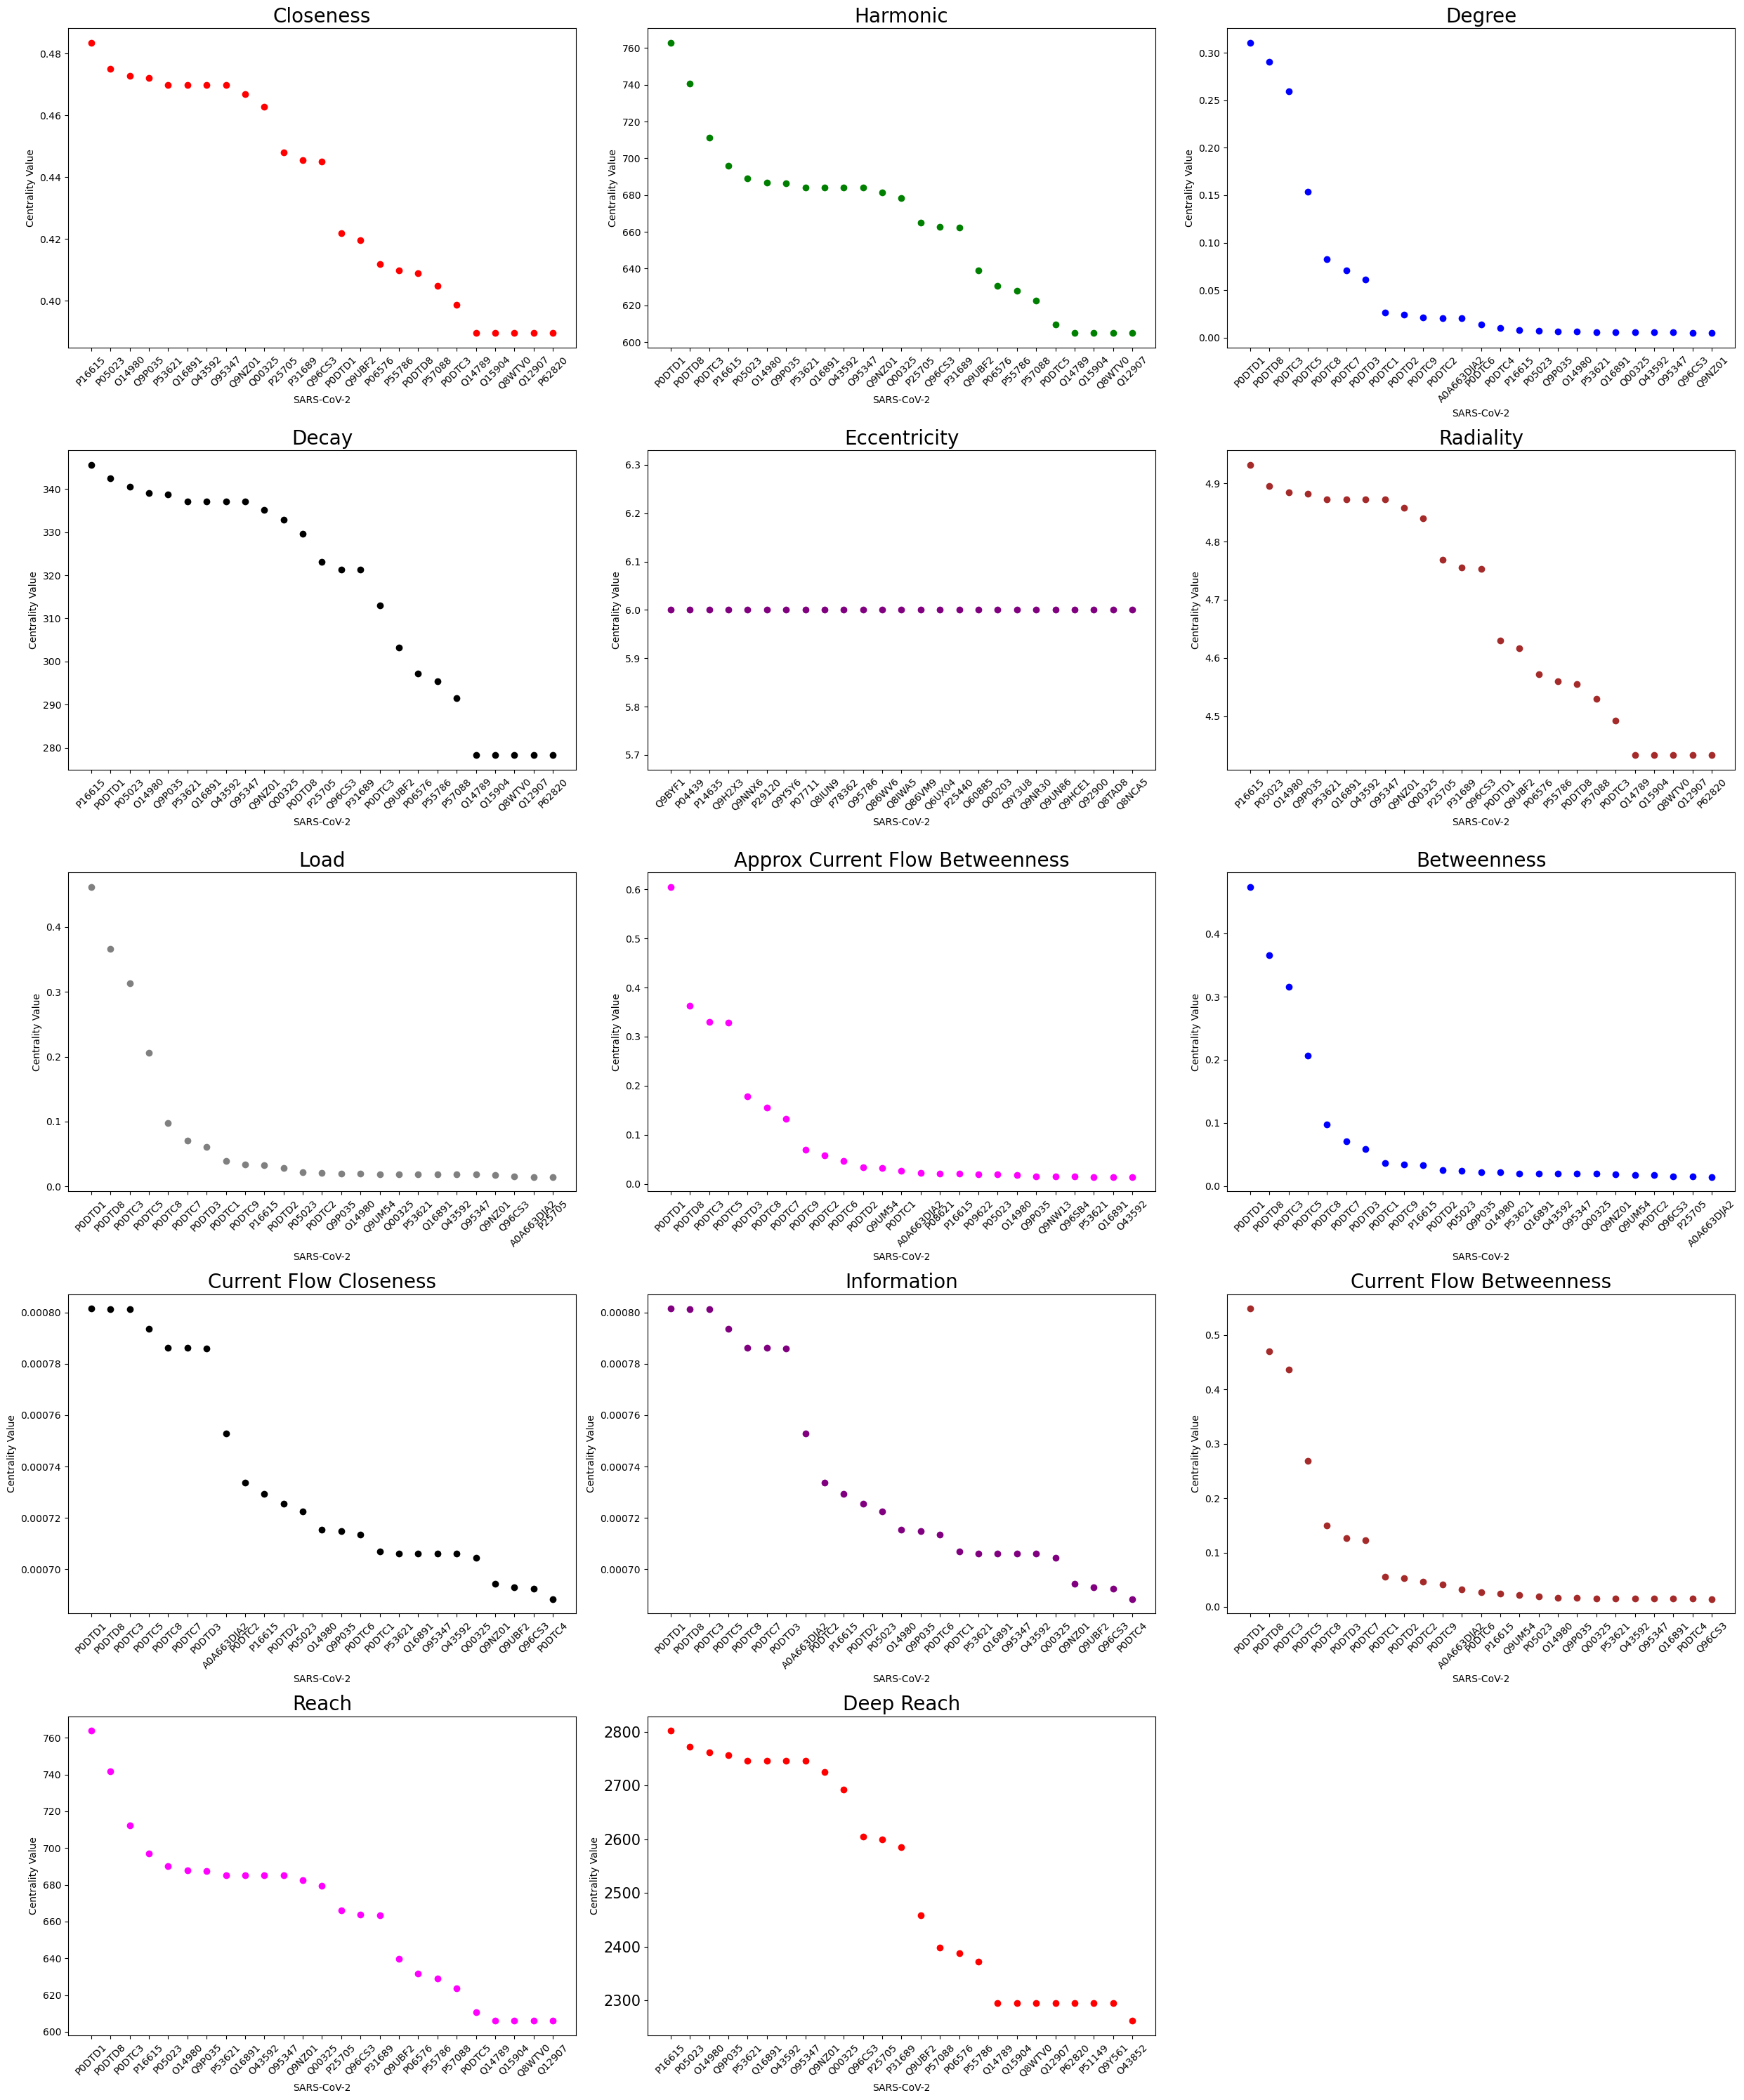

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load node labels for COVID and H1N1
corona_node_labels = pd.read_excel("datasets/corona_nodes.xlsx")

# Load centrality data for the two graphs and centrality measures
closeness_centrality = pd.read_excel("outputs/centrality_measures/closeness_centrality.xlsx")
harmonic_centrality = pd.read_excel("outputs/centrality_measures/harmonic_centrality.xlsx")
degree_centrality = pd.read_excel("outputs/centrality_measures/degree_centrality.xlsx")
decay_centrality = pd.read_excel("outputs/centrality_measures/decay_centrality.xlsx")
eccentricity = pd.read_excel("outputs/centrality_measures/eccentricity.xlsx")
radiality_centrality = pd.read_excel("outputs/centrality_measures/radiality_centrality.xlsx")
load_centrality = pd.read_excel("outputs/centrality_measures/load_centrality.xlsx")
approximate_current_flow_betweenness_centrality = pd.read_excel("outputs/centrality_measures/approximate_current_flow_betweenness_centrality.xlsx")
betweenness_centrality = pd.read_excel("outputs/centrality_measures/betweenness_centrality.xlsx")
current_flow_closeness_centrality = pd.read_excel("outputs/centrality_measures/current_flow_closeness_centrality.xlsx")
information_centrality = pd.read_excel("outputs/centrality_measures/information_centrality.xlsx")
current_flow_betweenness_centrality = pd.read_excel("outputs/centrality_measures/current_flow_betweenness_centrality.xlsx")
reach_centrality = pd.read_excel("outputs/centrality_measures/reach_centrality.xlsx")
deep_reach_centrality = pd.read_excel("outputs/centrality_measures/deep_reach_centrality.xlsx")

# Merge node labels with centrality data
closeness_centrality = closeness_centrality.merge(corona_node_labels, on='Node')
harmonic_centrality = harmonic_centrality.merge(corona_node_labels, on='Node')
degree_centrality = degree_centrality.merge(corona_node_labels, on='Node')
decay_centrality = decay_centrality.merge(corona_node_labels, on='Node')
eccentricity = eccentricity.merge(corona_node_labels, on='Node')
radiality_centrality =radiality_centrality.merge(corona_node_labels, on='Node')
load_centrality = load_centrality.merge(corona_node_labels, on='Node')
approximate_current_flow_betweenness_centrality = approximate_current_flow_betweenness_centrality.merge(corona_node_labels, on='Node')

betweenness_centrality = betweenness_centrality.merge(corona_node_labels, on='Node')
current_flow_closeness_centrality = current_flow_closeness_centrality.merge(corona_node_labels, on='Node')
information_centrality = information_centrality.merge(corona_node_labels, on='Node')
current_flow_betweenness_centrality = current_flow_betweenness_centrality.merge(corona_node_labels, on='Node')
reach_centrality = reach_centrality.merge(corona_node_labels, on='Node')
deep_reach_centrality = deep_reach_centrality.merge(corona_node_labels, on='Node')


# Choose the top number of nodes to visualize
num_top_nodes = 25

# Create subplots for each centrality measure
plt.figure(figsize=(25, 30))

# Closeness
plt.subplot(5, 3, 1)
top_nodes_closeness_centrality = closeness_centrality.nlargest(num_top_nodes, 'closeness_centrality')
plt.scatter(top_nodes_closeness_centrality['corona_nodes'], top_nodes_closeness_centrality['closeness_centrality'], color='red')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Closeness',fontsize=20)
plt.xticks(rotation=45)

# Harmonic
plt.subplot(5, 3, 2)
top_nodes_harmonic_centrality = harmonic_centrality.nlargest(num_top_nodes, 'harmonic_centrality')
plt.scatter(top_nodes_harmonic_centrality['corona_nodes'], top_nodes_harmonic_centrality['harmonic_centrality'], color='green')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Harmonic',fontsize=20)
plt.xticks(rotation=45)

# Degree
plt.subplot(5, 3, 3)
top_nodes_degree_centrality = degree_centrality.nlargest(num_top_nodes, 'degree_centrality')
plt.scatter(top_nodes_degree_centrality['corona_nodes'], top_nodes_degree_centrality['degree_centrality'], color='blue')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Degree',fontsize=20)
plt.xticks(rotation=45)

# Decay
plt.subplot(5, 3, 4)
top_nodes_decay_centrality = decay_centrality.nlargest(num_top_nodes, 'decay_centrality')
plt.scatter(top_nodes_decay_centrality['corona_nodes'], top_nodes_decay_centrality['decay_centrality'], color='black')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Decay',fontsize=20)
plt.xticks(rotation=45)

# Eccentricity
plt.subplot(5, 3, 5)
top_nodes_eccentricity = eccentricity.nlargest(num_top_nodes, 'eccentricity')
plt.scatter(top_nodes_eccentricity['corona_nodes'], top_nodes_eccentricity['eccentricity'], color='purple')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Eccentricity',fontsize=20)
plt.xticks(rotation=45)

# Radiality
plt.subplot(5, 3, 6)
top_nodes_radiality_centrality = radiality_centrality.nlargest(num_top_nodes, 'radiality_centrality')
plt.scatter(top_nodes_radiality_centrality['corona_nodes'], top_nodes_radiality_centrality['radiality_centrality'], color='brown')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Radiality',fontsize=20)
plt.xticks(rotation=45)

# load
plt.subplot(5, 3, 7)
top_nodes_load_centrality = load_centrality.nlargest(num_top_nodes, 'load_centrality')
plt.scatter(top_nodes_load_centrality['corona_nodes'], top_nodes_load_centrality['load_centrality'], color='gray')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Load',fontsize=20)
plt.xticks(rotation=45)

# Approximate Current Flow Betweenness
plt.subplot(5, 3, 8)
top_nodes_approximate_current_flow_betweenness_centrality = approximate_current_flow_betweenness_centrality.nlargest(num_top_nodes, 'approximate_current_flow_betweenness_centrality')
plt.scatter(top_nodes_approximate_current_flow_betweenness_centrality['corona_nodes'], top_nodes_approximate_current_flow_betweenness_centrality['approximate_current_flow_betweenness_centrality'], color='magenta')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Approx Current Flow Betweenness',fontsize=20)
plt.xticks(rotation=45)

# --------------
# Betweenness
plt.subplot(5, 3, 9)
top_nodes_betweenness_centrality = betweenness_centrality.nlargest(num_top_nodes, 'betweenness_centrality')
plt.scatter(top_nodes_betweenness_centrality['corona_nodes'], top_nodes_betweenness_centrality['betweenness_centrality'], color='blue')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Betweenness',fontsize=20)
plt.xticks(rotation=45)

# Current Flow Closeness
plt.subplot(5, 3, 10)
top_nodes_current_flow_closeness_centrality = current_flow_closeness_centrality.nlargest(num_top_nodes, 'current_flow_closeness_centrality')
plt.scatter(top_nodes_current_flow_closeness_centrality['corona_nodes'], top_nodes_current_flow_closeness_centrality['current_flow_closeness_centrality'], color='black')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Current Flow Closeness',fontsize=20)
plt.xticks(rotation=45)

# Information
plt.subplot(5, 3, 11)
top_nodes_information_centrality = information_centrality.nlargest(num_top_nodes, 'information_centrality')
plt.scatter(top_nodes_information_centrality['corona_nodes'], top_nodes_information_centrality['information_centrality'], color='purple')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Information',fontsize=20)
plt.xticks(rotation=45)

# Current Flow Betweenness
plt.subplot(5, 3, 12)
top_nodes_current_flow_betweenness_centrality = current_flow_betweenness_centrality.nlargest(num_top_nodes, 'current_flow_betweenness_centrality')
plt.scatter(top_nodes_current_flow_betweenness_centrality['corona_nodes'], top_nodes_current_flow_betweenness_centrality['current_flow_betweenness_centrality'], color='brown')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Current Flow Betweenness',fontsize=20)
plt.xticks(rotation=45)

# Reach
plt.subplot(5, 3, 13)
top_nodes_reach_centrality = reach_centrality.nlargest(num_top_nodes, 'reach_centrality')
plt.scatter(top_nodes_reach_centrality['corona_nodes'], top_nodes_reach_centrality['reach_centrality'], color='magenta')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Reach',fontsize=20)
plt.xticks(rotation=45)

# Deep Reach
plt.subplot(5, 3, 14)
top_nodes_deep_reach_centrality = deep_reach_centrality.nlargest(num_top_nodes, 'deep_reach_centrality')
plt.scatter(top_nodes_deep_reach_centrality['corona_nodes'], top_nodes_deep_reach_centrality['deep_reach_centrality'], color='red')
plt.xlabel('SARS-CoV-2')
plt.ylabel('Centrality Value')
plt.title('Deep Reach',fontsize=20)
plt.xticks(rotation=45)
plt.tick_params(axis='y', labelsize=15)



plt.tight_layout()

# # Save the combined image
combined_filename = "figures/centrality_measures.png"
plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
plt.show()

#  Merging Centrality Data

In [8]:
import pandas as pd

corona = pd.read_excel("datasets/corona_nodes.xlsx")

corona_clo = pd.read_excel("outputs/centrality_measures/closeness_centrality.xlsx")
corona_clo = corona_clo.sort_values(by=['Node'],ascending=True)

corona_har = pd.read_excel("outputs/centrality_measures/harmonic_centrality.xlsx")
corona_har = corona_har.sort_values(by=['Node'],ascending=True)

corona_deg = pd.read_excel("outputs/centrality_measures/degree_centrality.xlsx")
corona_deg = corona_deg.sort_values(by=['Node'],ascending=True)

corona_dec = pd.read_excel("outputs/centrality_measures/decay_centrality.xlsx")
corona_dec = corona_dec.sort_values(by=['Node'],ascending=True)

corona_ecc = pd.read_excel("outputs/centrality_measures/eccentricity.xlsx")
corona_ecc = corona_ecc.sort_values(by=['Node'],ascending=True)

corona_rad = pd.read_excel("outputs/centrality_measures/radiality_centrality.xlsx")
corona_rad = corona_rad.sort_values(by=['Node'],ascending=True)

corona_lc = pd.read_excel("outputs/centrality_measures/load_centrality.xlsx")
corona_lc = corona_lc.sort_values(by=['Node'],ascending=True)

corona_acf = pd.read_excel("outputs/centrality_measures/approximate_current_flow_betweenness_centrality.xlsx")
corona_acf = corona_acf.sort_values(by=['Node'],ascending=True)

corona_bet = pd.read_excel("outputs/centrality_measures/betweenness_centrality.xlsx")
corona_bet = corona_bet.sort_values(by=['Node'],ascending=True)

corona_cfc = pd.read_excel("outputs/centrality_measures/current_flow_closeness_centrality.xlsx")
corona_cfc = corona_cfc.sort_values(by=['Node'],ascending=True)

corona_info = pd.read_excel("outputs/centrality_measures/information_centrality.xlsx")
corona_info = corona_info.sort_values(by=['Node'],ascending=True)

corona_cfb = pd.read_excel("outputs/centrality_measures/current_flow_betweenness_centrality.xlsx")
corona_cfb = corona_cfb.sort_values(by=['Node'],ascending=True)

corona_rc = pd.read_excel("outputs/centrality_measures/reach_centrality.xlsx")
corona_rc = corona_rc.sort_values(by=['Node'],ascending=True)

corona_drc = pd.read_excel("outputs/centrality_measures/deep_reach_centrality.xlsx")
corona_drc = corona_drc.sort_values(by=['Node'],ascending=True)



corona_dt = corona.merge(corona_clo)
corona_dt = corona_dt.merge(corona_har)
corona_dt = corona_dt.merge(corona_deg)
corona_dt = corona_dt.merge(corona_dec)
corona_dt = corona_dt.merge(corona_ecc)
corona_dt = corona_dt.merge(corona_rad)
corona_dt = corona_dt.merge(corona_lc)
corona_dt = corona_dt.merge(corona_acf)
corona_dt = corona_dt.merge(corona_bet)
corona_dt = corona_dt.merge(corona_cfc)
corona_dt = corona_dt.merge(corona_info)
corona_dt = corona_dt.merge(corona_cfb)
corona_dt = corona_dt.merge(corona_rc)
corona_dt = corona_dt.merge(corona_drc)

corona_dt.to_excel('outputs/centrality_measures/corona_data_for_analysis/corona_centrality_data.xlsx',index=False)
corona_dt.head()

,Node,corona_nodes,closeness_centrality,harmonic_centrality,degree_centrality,decay_centrality,eccentricity,radiality_centrality,load_centrality,approximate_current_flow_betweenness_centrality,betweenness_centrality,current_flow_closeness_centrality,information_centrality,current_flow_betweenness_centrality,reach_centrality,deep_reach_centrality
0,1,Q9BYF1,0.241924,349.750000,0.00071,89.171875,6,2.866477,0.0,0.0,0.0,0.000361,0.000361,-1.434675e-20,350.750000,1108.550000
1,2,O75347,0.253968,362.833333,0.00071,97.000000,4,3.062500,0.0,0.0,0.0,0.000354,0.000354,1.434675e-20,363.833333,1162.583333
2,3,Q92769,0.296796,462.833333,0.00071,172.000000,4,3.630682,0.0,0.0,0.0,0.000377,0.000377,0.000000e+00,463.833333,1588.750000
3,4,O15226,0.296796,462.833333,0.00071,172.000000,4,3.630682,0.0,0.0,0.0,0.000377,0.000377,0.000000e+00,463.833333,1588.750000
4,5,Q53GL7,0.296796,462.833333,0.00071,172.000000,4,3.630682,0.0,0.0,0.0,0.000377,0.000377,0.000000e+00,463.833333,1588.750000


#  Scaling Centrality Data

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

corona_dt = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_data.xlsx")

corona_column_names = [column for column in corona_dt.columns if column not in ['Node', 'corona_nodes']]
scaler = StandardScaler()

corona_scaled_columns = scaler.fit_transform(corona_dt[corona_column_names])


corona_scaled_df = pd.DataFrame(corona_scaled_columns, columns=corona_column_names)

corona_scaled_df['Node'] = corona_dt['Node']
corona_scaled_df['corona_nodes'] = corona_dt['corona_nodes']


corona_scaled_df = corona_scaled_df[['Node', 'corona_nodes'] + corona_column_names]

corona_scaled_df.to_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx",index=False)

corona_scaled_df

,Node,corona_nodes,closeness_centrality,harmonic_centrality,degree_centrality,decay_centrality,eccentricity,radiality_centrality,load_centrality,approximate_current_flow_betweenness_centrality,betweenness_centrality,current_flow_closeness_centrality,information_centrality,current_flow_betweenness_centrality,reach_centrality,deep_reach_centrality
0,1,Q9BYF1,-1.461197,-1.689942,-0.086065,-1.709101,0.786518,-1.668901,-0.092670,-0.111703,-0.091548,-0.677819,-0.677819,-0.109939,-1.689942,-1.721808
1,2,O75347,-1.096229,-1.465548,-0.086065,-1.524003,-1.273341,-1.161519,-0.092670,-0.111703,-0.091548,-0.757996,-0.757996,-0.109939,-1.465548,-1.511747
2,3,Q92769,0.201590,0.249568,-0.086065,0.249388,-1.273341,0.309154,-0.092670,-0.111703,-0.091548,-0.487025,-0.487025,-0.109939,0.249568,0.145024
3,4,O15226,0.201590,0.249568,-0.086065,0.249388,-1.273341,0.309154,-0.092670,-0.111703,-0.091548,-0.487025,-0.487025,-0.109939,0.249568,0.145024
4,5,Q53GL7,0.201590,0.249568,-0.086065,0.249388,-1.273341,0.309154,-0.092670,-0.111703,-0.091548,-0.487025,-0.487025,-0.109939,0.249568,0.145024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,P0DTC3,3.291248,4.512490,18.041504,3.584842,-0.243411,2.539063,16.323973,13.737237,16.227973,4.680933,4.680933,17.679665,4.512490,1.193577
1405,1406,A0A663DJA2,1.216382,0.598023,1.308363,0.534609,-0.243411,1.193397,0.690135,0.826776,0.657320,4.092419,4.092419,1.208847,0.598023,0.363119
1406,1407,P0DTC7,1.561257,1.409844,4.844235,1.164162,-0.243411,1.454441,3.627878,5.435577,3.561163,4.497946,4.497946,4.862687,1.409844,0.650154
1407,1408,P0DTD3,1.771456,1.381545,4.147021,1.168596,-2.303270,1.605185,3.129691,7.354793,2.945624,4.496569,4.496569,5.040052,1.381545,0.701924


# Forming Dissimilarity Matrix

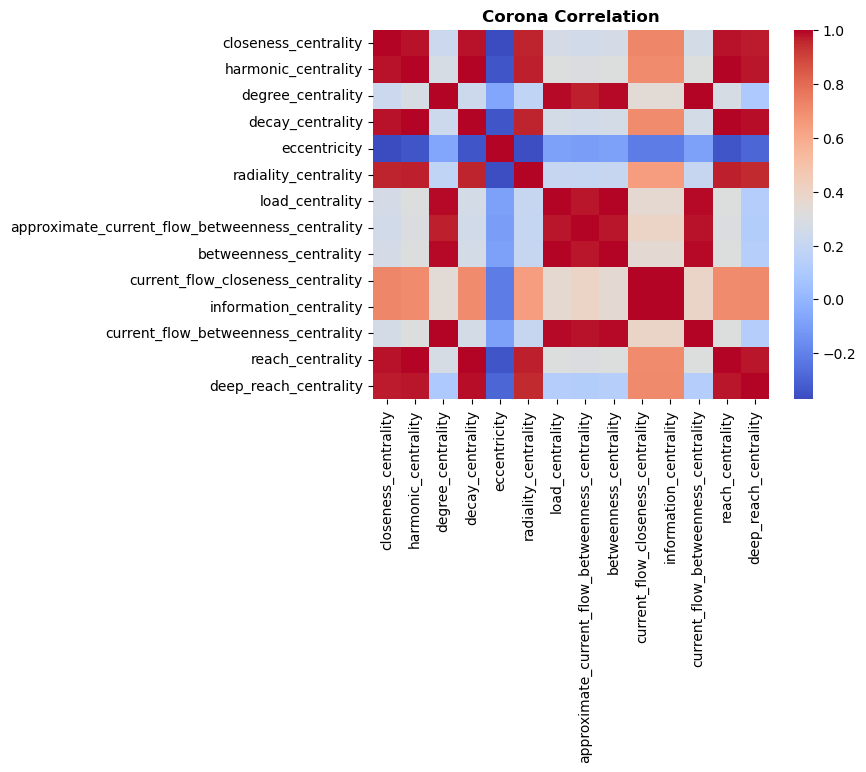

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
corona_scaled = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx")

corona_scaled = corona_scaled.drop(['Node', 'corona_nodes'], axis=1)

corona_correlation = corona_scaled.corr()


# Plot the corona correlation
plt.title('Corona Correlation',fontweight='bold')
sns.heatmap(corona_correlation, annot=False, cmap='coolwarm', linewidths=0)


combined_filename = "figures/dissimilarity_matrix_for_corona.png"
plt.savefig(combined_filename, dpi=300, bbox_inches='tight')


plt.show()

In [22]:
print(corona_scaled['reach_centrality'].corr(corona_scaled['deep_reach_centrality']))

0.9757133546996009


# Pearson Correlation Coefficient

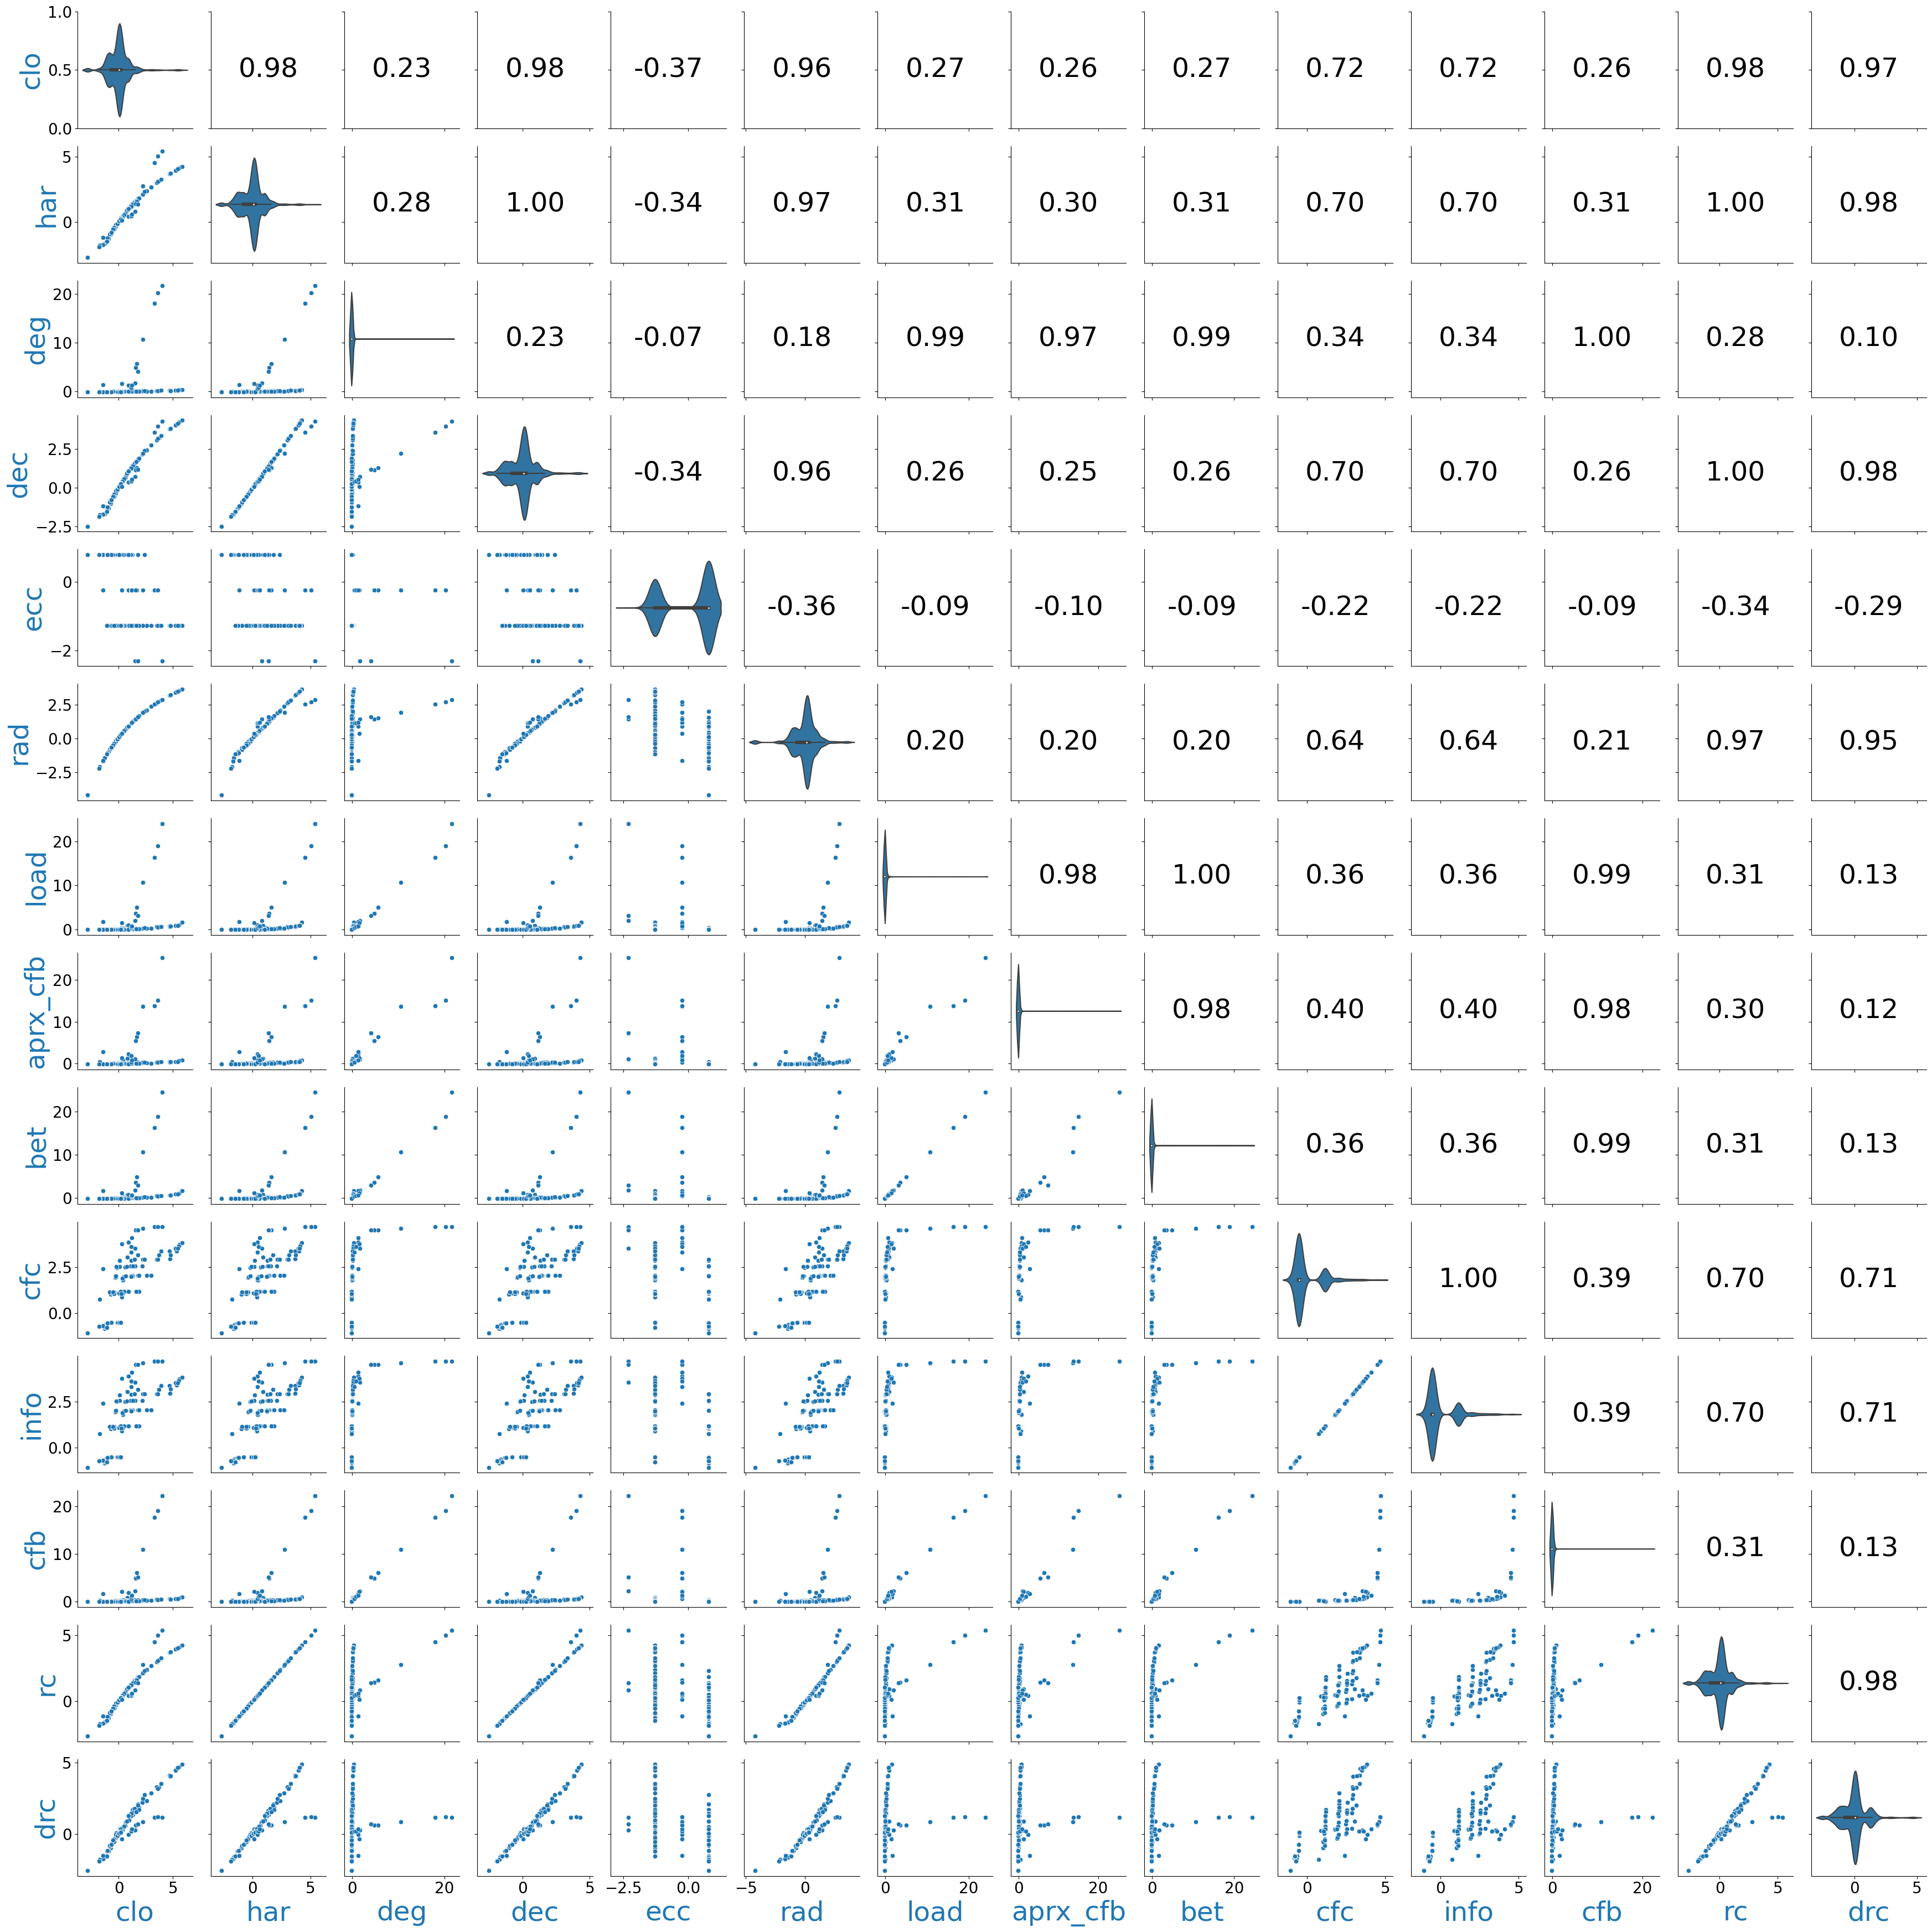

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def corr_func(x, y, **kwargs):
    corr_coef = x.corr(y)
    ax = plt.gca()
    ax.annotate(f"{corr_coef:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes, fontsize=35, ha='center', va='center')

# Load your DataFrame
corona_scaled = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx")

corona_scaled = corona_scaled.drop(['Node', 'corona_nodes'], axis=1)

# Rename the large name for better visualition 
corona_scaled.rename(columns={'closeness_centrality': 'clo'}, inplace=True)
corona_scaled.rename(columns={'harmonic_centrality': 'har'}, inplace=True)
corona_scaled.rename(columns={'degree_centrality': 'deg'}, inplace=True)
corona_scaled.rename(columns={'decay_centrality': 'dec'}, inplace=True)
corona_scaled.rename(columns={'eccentricity': 'ecc'}, inplace=True)
corona_scaled.rename(columns={'radiality_centrality': 'rad'}, inplace=True)
corona_scaled.rename(columns={'load_centrality': 'load'}, inplace=True)
corona_scaled.rename(columns={'approximate_current_flow_betweenness_centrality': 'aprx_cfb'}, inplace=True)
corona_scaled.rename(columns={'betweenness_centrality': 'bet'}, inplace=True)
corona_scaled.rename(columns={'current_flow_closeness_centrality': 'cfc'}, inplace=True)
corona_scaled.rename(columns={'information_centrality': 'info'}, inplace=True)
corona_scaled.rename(columns={'current_flow_betweenness_centrality': 'cfb'}, inplace=True)
corona_scaled.rename(columns={'reach_centrality': 'rc'}, inplace=True)
corona_scaled.rename(columns={'deep_reach_centrality': 'drc'}, inplace=True)


dis_deg = ['clo',
           'har',
           'deg',
           'dec',
           'ecc',
           'rad',
           'load',
           'aprx_cfb',
           'bet',
           'cfc',
           'info',
           'cfb',
           'rc',
           'drc']


def increase_font_size(*args, **kwargs):
    kwargs['fontsize'] = 35  # Adjust the fontsize as needed
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=20)  # Increase font size for ticks
    ax.set_xlabel(ax.get_xlabel(), **kwargs)
    ax.set_ylabel(ax.get_ylabel(), **kwargs)

# Create a PairGrid with scatterplots and correlation values

# Distance and Degree based
g = sns.PairGrid(corona_scaled, vars=dis_deg)
g.map_upper(corr_func)  
g.map_diag(sns.violinplot) 
g.map_lower(sns.scatterplot)
g.map(increase_font_size)

g_filename = "figures/pearson_corr_values_dis_deg.png"
g.savefig(g_filename, dpi=300, bbox_inches='tight')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Forming PCA

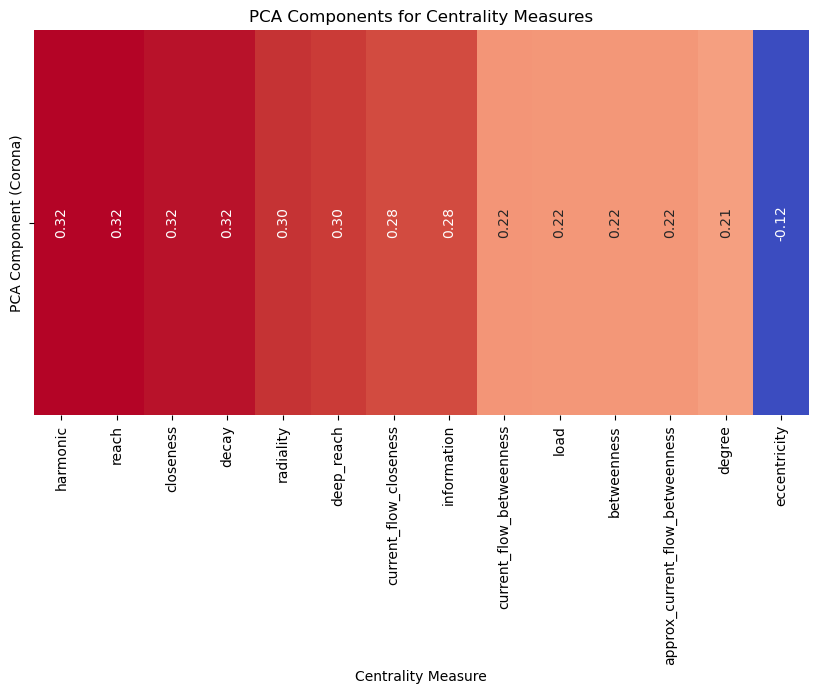

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

covid_scaled = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx")

covid_scaled = covid_scaled.drop(['Node', 'corona_nodes'], axis=1)

Functions = covid_scaled.columns.tolist()

Functions = [func.replace('_centrality', '') for func in Functions]
index_to_update = Functions.index('approximate_current_flow_betweenness')

Functions[index_to_update] = 'approx_current_flow_betweenness'

pca_covid = PCA()

pca_covid.fit(covid_scaled)

pca_components_covid = pca_covid.components_[0]

visualization_df = pd.DataFrame({
    'Centrality Measure': Functions,
    'PCA Component (Corona)': pca_components_covid
})
cluster_analysis=visualization_df
visualization_df = visualization_df.sort_values(by='PCA Component (Corona)',ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.heatmap(data=visualization_df.set_index('Centrality Measure').T, cmap='coolwarm', annot=True,
                 fmt=".2f", cbar=False, annot_kws={"rotation": 90})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Reset xticklabels to horizontal
plt.title('PCA Components for Centrality Measures')

plt.savefig("figures/pca.png", dpi=300, bbox_inches='tight')
cluster_analysis.to_csv('outputs/pca.csv',index=False)

plt.show()


# Cluster Analysis

# finding_optimal_cluster

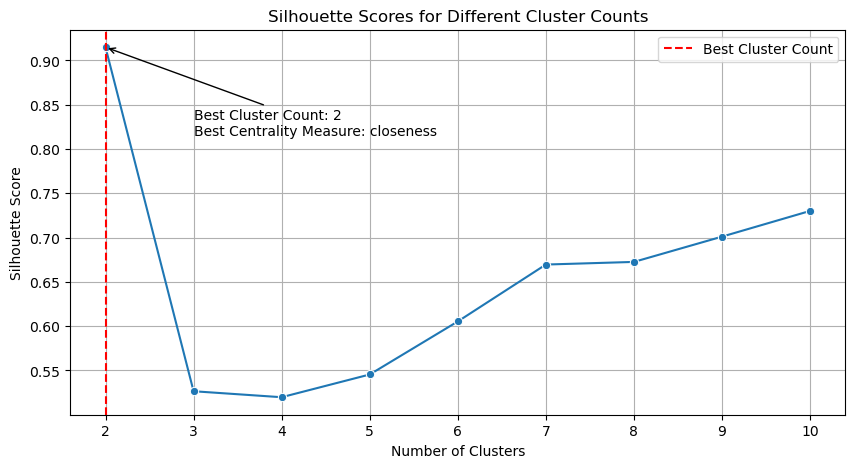

[0.9149539182529308, 0.526536352938799, 0.5197785685349975, 0.5454389471888649, 0.6053210801709421, 0.6695782189931844, 0.6725488206843684, 0.7010835555930075, 0.7301026182295877]


,closeness,harmonic,degree,decay,eccentricity,radiality,load,approx_current_flow_betweenness,betweenness,current_flow_closeness,information,current_flow_betweenness,reach,deep_reach,Cluster
0,-1.461197,-1.689942,-0.086065,-1.709101,0.786518,-1.668901,-0.092670,-0.111703,-0.091548,-0.677819,-0.677819,-0.109939,-1.689942,-1.721808,0
1,-1.096229,-1.465548,-0.086065,-1.524003,-1.273341,-1.161519,-0.092670,-0.111703,-0.091548,-0.757996,-0.757996,-0.109939,-1.465548,-1.511747,0
2,0.201590,0.249568,-0.086065,0.249388,-1.273341,0.309154,-0.092670,-0.111703,-0.091548,-0.487025,-0.487025,-0.109939,0.249568,0.145024,0
3,0.201590,0.249568,-0.086065,0.249388,-1.273341,0.309154,-0.092670,-0.111703,-0.091548,-0.487025,-0.487025,-0.109939,0.249568,0.145024,0
4,0.201590,0.249568,-0.086065,0.249388,-1.273341,0.309154,-0.092670,-0.111703,-0.091548,-0.487025,-0.487025,-0.109939,0.249568,0.145024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,3.291248,4.512490,18.041504,3.584842,-0.243411,2.539063,16.323973,13.737237,16.227973,4.680933,4.680933,17.679665,4.512490,1.193577,1
1405,1.216382,0.598023,1.308363,0.534609,-0.243411,1.193397,0.690135,0.826776,0.657320,4.092419,4.092419,1.208847,0.598023,0.363119,0
1406,1.561257,1.409844,4.844235,1.164162,-0.243411,1.454441,3.627878,5.435577,3.561163,4.497946,4.497946,4.862687,1.409844,0.650154,0
1407,1.771456,1.381545,4.147021,1.168596,-2.303270,1.605185,3.129691,7.354793,2.945624,4.496569,4.496569,5.040052,1.381545,0.701924,0


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading data
covid_scaled = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx")
covid_scaled = covid_scaled.drop(['Node', 'corona_nodes'], axis=1)

# Rename the columns
Functions = covid_scaled.columns.tolist()
Functions = [func.replace('_centrality', '') for func in Functions]
index_to_update = Functions.index('approximate_current_flow_betweenness')
Functions[index_to_update] = 'approx_current_flow_betweenness'
covid_scaled.columns = Functions


centrality_measure_names = covid_scaled.columns.tolist()

# Initialize variables to keep track of silhouette scores and cluster counts
silhouette_scores = []
cluster_counts = list(range(2, 11)) 

# Iterate over different values of k to calculate silhouette scores
for k in cluster_counts:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(covid_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(covid_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Find the index of the highest silhouette score
best_cluster_index = silhouette_scores.index(max(silhouette_scores))
best_cluster_count = cluster_counts[best_cluster_index]


# Highlight the function name with the highest silhouette score
best_centrality_measure_name = centrality_measure_names[best_cluster_index]
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
sns.lineplot(x=cluster_counts, y=silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Highlight the best cluster count
plt.axvline(x=best_cluster_count, color='red', linestyle='--', label='Best Cluster Count')

# Annotate the best cluster count
plt.annotate(f'Best Cluster Count: {best_cluster_count}\nBest Centrality Measure: {best_centrality_measure_name}',
             xy=(best_cluster_count, max(silhouette_scores)),
             xytext=(best_cluster_count + 1, max(silhouette_scores) - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.grid(True)

plt.savefig("figures/optimal cluster.png", dpi=300, bbox_inches='tight')

plt.show()

kmeans = KMeans(n_clusters=best_cluster_count,n_init=10)
cluster_labels = kmeans.fit_predict(covid_scaled)
covid_scaled['Cluster'] = cluster_labels

covid_scaled.to_csv('outputs/corona_cluster_analysis.csv',index=False)

# covid_scaled
print(silhouette_scores)
covid_scaled


# visualise_clusters

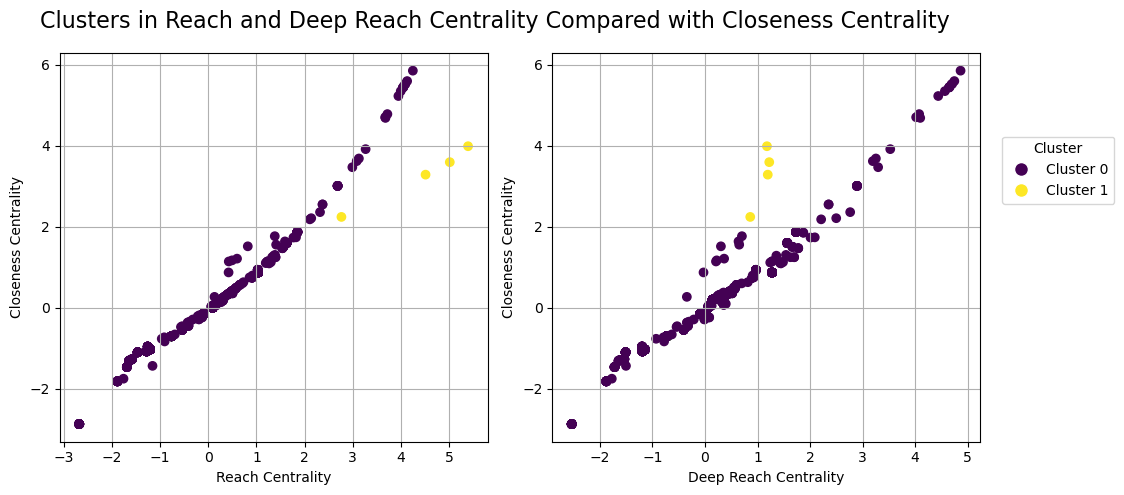

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

covid_scaled = pd.read_csv("outputs/corona_cluster_analysis.csv")

c = covid_scaled['Cluster']

# Determine unique clusters and their associated colors
unique_clusters = np.unique(c)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Adjust the colormap as needed

# Create a custom legend with color patches
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=f'Cluster {cluster}')
                  for cluster, color in zip(unique_clusters, colors)]

# Create a figure with two subplots using plt.subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Scatter plot 1
axs[0].grid(True)  # Add grid

axs[0].scatter(covid_scaled['reach'], covid_scaled['closeness'], c=c)
axs[0].set_ylabel('Closeness Centrality')  # Swap y and x labels
axs[0].set_xlabel('Reach Centrality')  # Swap y and x labels


# Scatter plot 2
axs[1].grid(True)  # Add grid

axs[1].scatter(covid_scaled['deep_reach'], covid_scaled['closeness'], c=c)
axs[1].set_ylabel('Closeness Centrality')  # Swap y and x labels
axs[1].set_xlabel('Deep Reach Centrality')  # Swap y and x labels


# Create a single legend for both subplots to the right of the second subplot
fig.legend(handles=legend_patches, title='Cluster', loc='center left', bbox_to_anchor=(1, 0.66))

fig.suptitle('Clusters in Reach and Deep Reach Centrality Compared with Closeness Centrality', fontsize=16, ha='center')


plt.tight_layout()

plt.savefig("figures/Clusters Reach and Deep Reach with Closeness.png", dpi=300, bbox_inches='tight')


plt.show()


# silhouette_widths_for_optimal_cluster

Average Silhouette Width: 0.8293973887713378


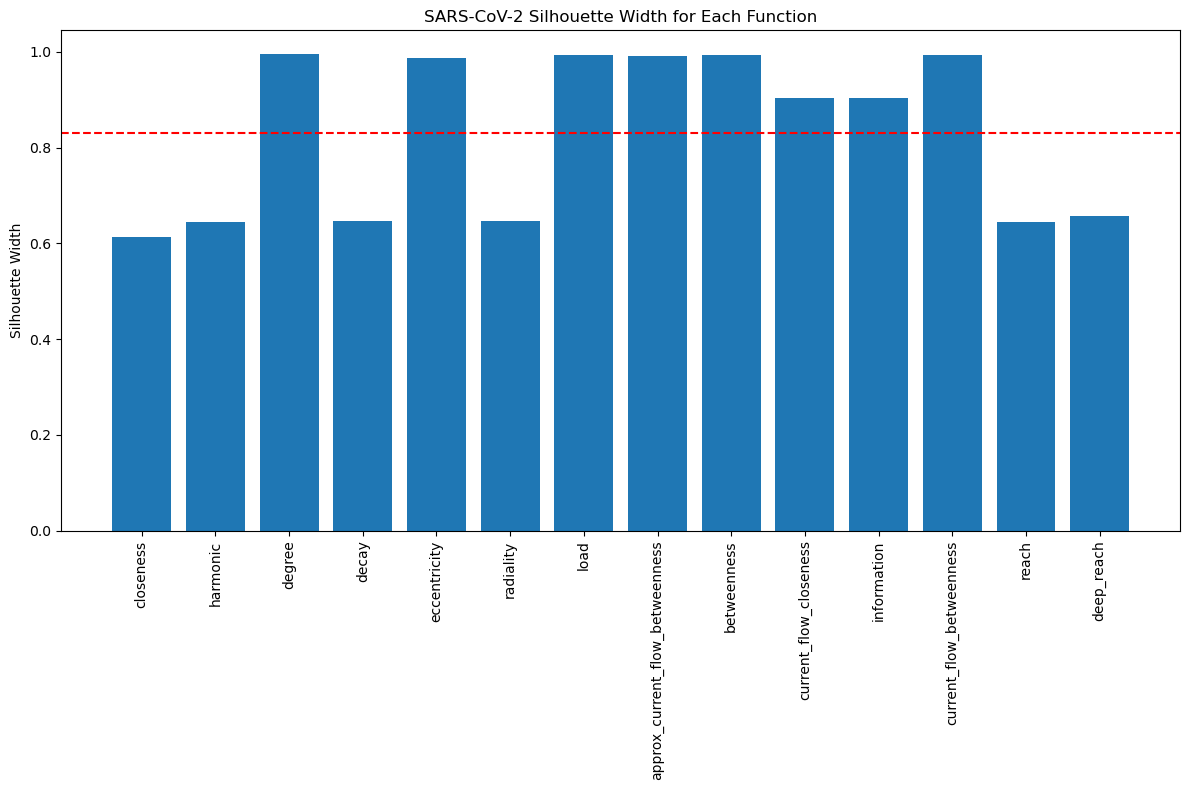

,centrality,silhouette_widths
0,closeness,0.612553
1,harmonic,0.644153
2,degree,0.994946
3,decay,0.647295
4,eccentricity,0.986700
5,radiality,0.646928
6,load,0.993957
7,approx_current_flow_betweenness,0.991729
8,betweenness,0.994038
9,current_flow_closeness,0.902921


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load your scaled data and drop unnecessary columns
covid_scaled = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx")
covid_scaled = covid_scaled.drop(['Node', 'corona_nodes'], axis=1)

Functions = covid_scaled.columns.tolist()

Functions = [func.replace('_centrality', '') for func in Functions]
index_to_update = Functions.index('approximate_current_flow_betweenness')

Functions[index_to_update] = 'approx_current_flow_betweenness'
covid_scaled.columns = Functions

# Initialize an empty list to store silhouette widths
silhouette_widths = []


# Iterate through columns and calculate silhouette widths
for column in covid_scaled.columns:
    # Perform K-means clustering 
    # Here we are taking optimal cluster number k=2 because we already defined using silhouette method
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(covid_scaled[column].values.reshape(-1, 1))
    # Calculate silhouette score
    silhouette_avg = silhouette_score(covid_scaled[column].values.reshape(-1, 1), cluster_labels)
    silhouette_widths.append(silhouette_avg)

average_silhouette_width = sum(silhouette_widths) / len(silhouette_widths)
print("Average Silhouette Width:", average_silhouette_width)

# Create a bar plot for silhouette widths
plt.figure(figsize=(12, 8))
plt.bar(covid_scaled.columns, silhouette_widths)
# Add a horizontal line for the average silhouette width
plt.axhline(y=average_silhouette_width, color='red', linestyle='--', label='Average Silhouette Width')
# plt.xlabel('SARS-CoV-2',fontsize=20)
plt.ylabel('Silhouette Width')
plt.title('SARS-CoV-2 Silhouette Width for Each Function')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
# Show the legend for the average silhouette width
plt.tight_layout()
plt.show()

all_silhouette_widths = pd.DataFrame({'centrality':covid_scaled.columns,
                                      'silhouette_widths':silhouette_widths
                                     })
all_silhouette_widths.to_csv('outputs/all_silhouette_widths.csv',index=False)

all_silhouette_widths


# elbow_method_final_cluster_number

C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

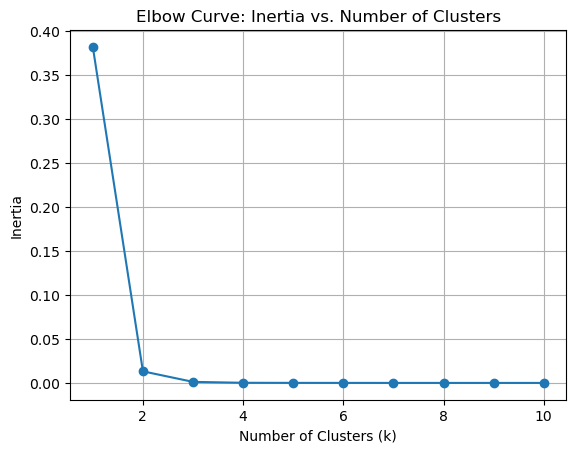

Optimal number of clusters based on elbow method: 10


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

all_silhouette_widths = pd.read_csv('outputs/all_silhouette_widths.csv')

all_sw = pd.DataFrame({'silhouette_widths':all_silhouette_widths['silhouette_widths']})


# Elbow method
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42 ,n_init=10)
    kmeans.fit_predict(all_sw)
    inertia_values.append(kmeans.inertia_)


plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve: Inertia vs. Number of Clusters')
plt.grid(True)

plt.savefig("figures/final optimal cluster based on elbow method.png", dpi=300, bbox_inches='tight')


plt.show()

# Find the optimal number of clusters based on the elbow method
optimal_k_elbow = k_values[np.argmin(inertia_values)]
print(f"Optimal number of clusters based on elbow method: {optimal_k_elbow}")


# final_centrality_clusters

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

all_silhouette_widths = pd.read_csv('outputs/all_silhouette_widths.csv')

all_sw = pd.DataFrame({'silhouette_widths':all_silhouette_widths['silhouette_widths']})

average_silhouette_width = sum(all_silhouette_widths['silhouette_widths']) / len(all_silhouette_widths['silhouette_widths'])
print("Average Silhouette Width:", average_silhouette_width)


for k in range(2,11):
    kmeans = KMeans(n_clusters=k,  random_state=0, n_init = 10) # n_init = 10 to supress warning
    cluster_labels = kmeans.fit_predict(all_sw)
    all_silhouette_widths['Cluster'] = cluster_labels

    
all_silhouette_widths = all_silhouette_widths.sort_values(by=['Cluster'])

x1_length = len(all_silhouette_widths)

legend_labels = {
    'Cluster 9': '#17becf',
    'Cluster 8': '#bcbd22',
    'Cluster 7': '#7f7f7f',
    'Cluster 6': '#e377c2',
    'Cluster 5': '#8c564b',
    'Cluster 4': '#9467bd',
    'Cluster 3': '#d62728',
    'Cluster 2': '#2ca02c',
    'Cluster 1': '#ff7f0e',
    'Cluster 0': '#1f77b4'
}

single_digit_mapping = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3',
    4: 'Cluster 4',
    5: 'Cluster 5',
    6: 'Cluster 6',
    7: 'Cluster 7',
    8: 'Cluster 8',
    9: 'Cluster 9'
}
all_silhouette_widths['Legend'] = all_silhouette_widths['Cluster'].map(single_digit_mapping)
all_silhouette_widths['bar_color'] = all_silhouette_widths['Legend'].map(legend_labels)


fig = px.bar(all_silhouette_widths, x='centrality', y='silhouette_widths', color=all_silhouette_widths['Legend'],
             title='Silhouette plot, average silhouette width: 0.829',
#              text = all_silhouette_widths['silhouette_widths'],
             labels={'centrality': '', 'Silhouette_Width': 'Silhouette Width', 'Cluster': 'Clusters'},
             category_orders={'Cluster': [f'Cluster_{k}' for k in range(2, 11)]})

fig.add_shape(type='line', x0=-0.5, x1=x1_length,
              y0=average_silhouette_width, y1=average_silhouette_width,
              line=dict(color='red', width=2, dash='dash'),
              name='Average Silhouette Width')
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for better visibility


fig.update_layout(
    width=800,  
    height=600,
    showlegend=True,  
    legend_title_text='Clusters'
)

fig.write_image("figures/clusters_in_centrality_functions.png", engine="kaleido")

fig.show()

all_silhouette_widths


Average Silhouette Width: 0.8293973887713378


C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sarat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

,centrality,silhouette_widths,Cluster,Legend,bar_color
7,approx_current_flow_betweenness,0.991729,0,Cluster 0,#1f77b4
1,harmonic,0.644153,1,Cluster 1,#ff7f0e
12,reach,0.644153,1,Cluster 1,#ff7f0e
9,current_flow_closeness,0.902921,2,Cluster 2,#2ca02c
10,information,0.902921,2,Cluster 2,#2ca02c
0,closeness,0.612553,3,Cluster 3,#d62728
13,deep_reach,0.656844,4,Cluster 4,#9467bd
6,load,0.993957,5,Cluster 5,#8c564b
8,betweenness,0.994038,5,Cluster 5,#8c564b
4,eccentricity,0.986700,6,Cluster 6,#e377c2


# dendrogram_for_corona_datasets

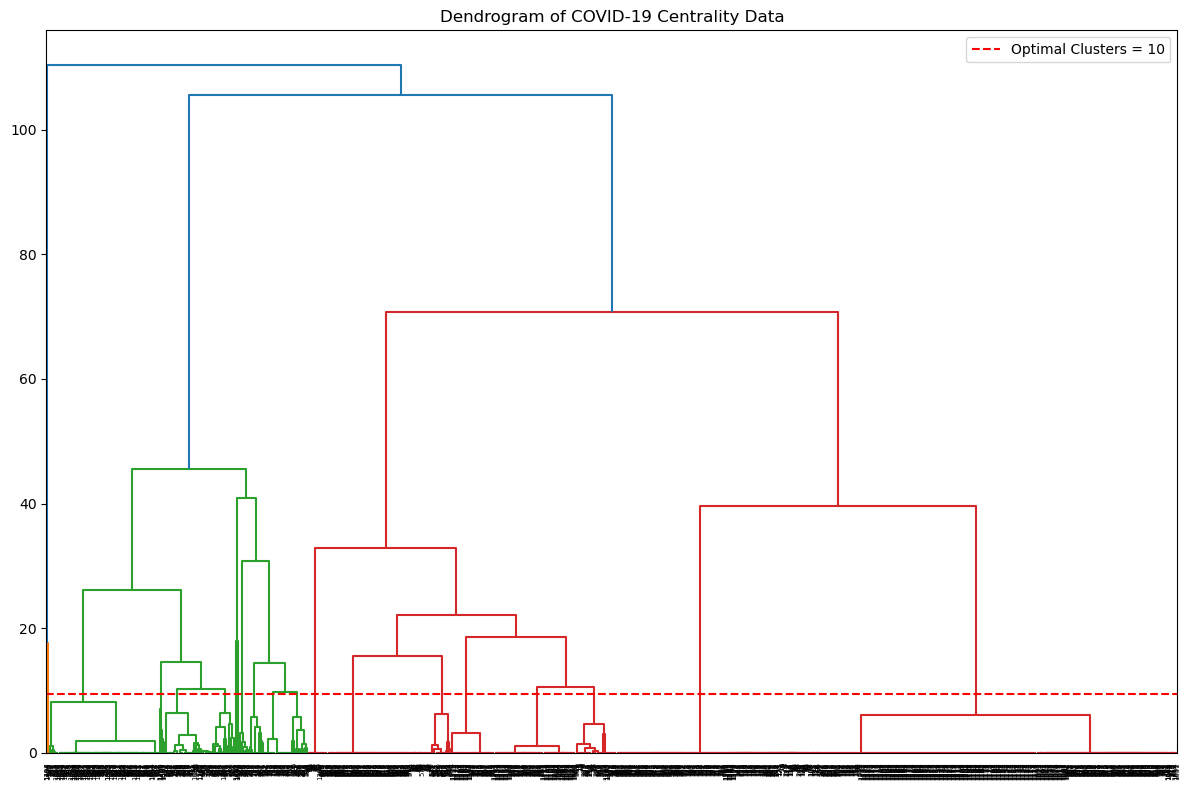

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Load your data and preprocess as you mentioned
covid_scaled = pd.read_excel("outputs/centrality_measures/corona_data_for_analysis/corona_centrality_scaled_data.xlsx")
covid_scaled = covid_scaled.drop(['Node', 'corona_nodes'], axis=1)

Functions = covid_scaled.columns.tolist()
Functions = [func.replace('_centrality', '') for func in Functions]
index_to_update = Functions.index('approximate_current_flow_betweenness')
Functions[index_to_update] = 'approx_current_flow_betweenness'
covid_scaled.columns = Functions

# Convert the data to a numpy array
data_array = covid_scaled.values

# Calculate the linkage matrix for hierarchical clustering
linkage_matrix = hierarchy.linkage(data_array, method='ward')

# Create dendrogram with function names as labels and rotate it
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=covid_scaled.index, orientation='top')  # Rotate to 'left'
plt.title('Dendrogram of COVID-19 Centrality Data')

# Determine the optimal cluster count using the elbow method
# Look for the "elbow point" in the dendrogram
optimal_cluster_count = 10  # Change this to the determined optimal count

# Plot a horizontal line to indicate the optimal cluster count
plt.axhline(y=optimal_cluster_count - 0.5, color='red', linestyle='--', label=f'Optimal Clusters = {optimal_cluster_count}')

plt.legend()
plt.tight_layout()

plt.savefig("figures/all_corona_data_dendrogram.png", dpi=300, bbox_inches='tight')

plt.show()


# dendrogram_pca

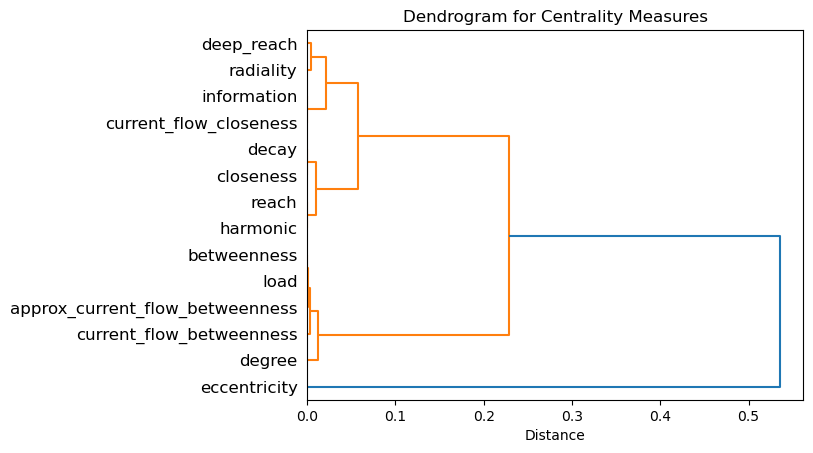

,Centrality Measure,PCA Component (Corona)
0,closeness,0.318027
1,harmonic,0.324667
2,degree,0.206781
3,decay,0.317896
4,eccentricity,-0.121333
5,radiality,0.302029
6,load,0.216328
7,approx_current_flow_betweenness,0.215286
8,betweenness,0.216252
9,current_flow_closeness,0.284728


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

cluster_analysis = pd.read_csv("outputs/pca.csv")


distance_matrix = hierarchy.linkage(np.array(cluster_analysis['PCA Component (Corona)']).reshape(-1, 1), method='ward')

# Create a dendrogram
dendrogram = hierarchy.dendrogram(distance_matrix, labels=cluster_analysis['Centrality Measure'].tolist(), orientation='right')

# Customize the plot
plt.title('Dendrogram for Centrality Measures')
plt.xlabel('Distance')

plt.savefig("figures/pca_dendrogram.png", dpi=300, bbox_inches='tight')

# Show the dendrogram
plt.show()

cluster_analysis

# dendrogram_silhouette_widths

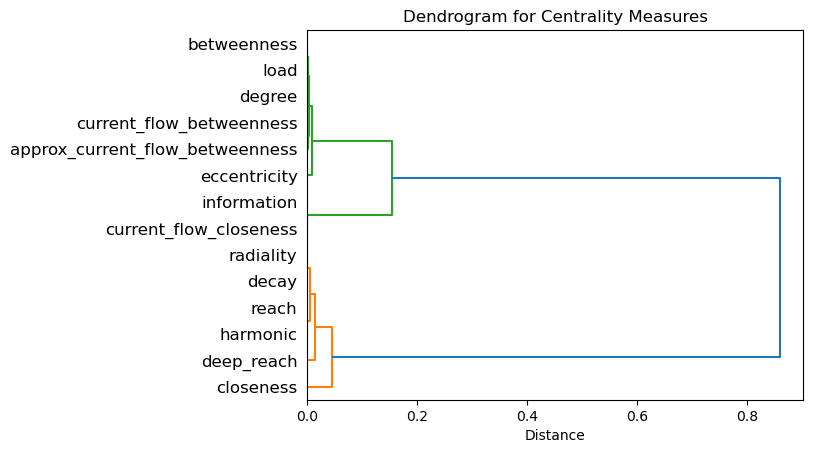

,centrality,silhouette_widths
0,closeness,0.612553
1,harmonic,0.644153
2,degree,0.994946
3,decay,0.647295
4,eccentricity,0.986700
5,radiality,0.646928
6,load,0.993957
7,approx_current_flow_betweenness,0.991729
8,betweenness,0.994038
9,current_flow_closeness,0.902921


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy


all_silhouette_widths = pd.read_csv('outputs/all_silhouette_widths.csv')


dendro_all_silhouette_widths = pd.DataFrame({'centrality':all_silhouette_widths['centrality'],
                                             'silhouette_widths':all_silhouette_widths['silhouette_widths']})


distance_matrix = hierarchy.linkage(np.array(dendro_all_silhouette_widths['silhouette_widths']).reshape(-1, 1), method='ward')

# Create a dendrogram
dendrogram = hierarchy.dendrogram(distance_matrix, labels=dendro_all_silhouette_widths['centrality'].tolist(), orientation='right')

# Customize the plot
plt.title('Dendrogram for Centrality Measures')
plt.xlabel('Distance')

plt.savefig("figures/silhouette_widths_dendrogram.png", dpi=300, bbox_inches='tight')

# Show the dendrogram
plt.show()

dendro_all_silhouette_widths